In [88]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [ ]:
!wget http://api.bitcoincharts.com/v1/csv/coincheckJPY.csv.gz
!gzip -d ./coincheckJPY.csv.gz
!ls -la 

4Gくらい。

import pandas as pd
from datetime import datetime

df = pd.read_csv("./coincheckJPY.csv",
                 header=None,
                 parse_dates=True,
                 date_parser=lambda x: datetime.fromtimestamp(float(x)),
                 index_col='datetime',
                 names=['datetime', 'price', 'amount'])
#df["price"].plot()

めっちゃ時間かかる。

In [24]:
len(df.index.values)

91162378

In [25]:
df.index.values

array(['2014-10-31T06:12:09.000000000', '2014-10-31T07:13:24.000000000',
       '2014-10-31T07:21:25.000000000', ...,
       '2018-02-14T00:02:55.000000000', '2018-02-14T00:02:56.000000000',
       '2018-02-14T00:02:56.000000000'], dtype='datetime64[ns]')

In [29]:
df.to_pickle('df_coincheckJPY.pickle')

In [30]:
!ls -la 

total 6270796
drwxr-xr-x  3 root root       4096 Feb 14 10:43 .
drwx------ 33 root root       4096 Feb 14 10:30 ..
drwxr-xr-x  2 root root       4096 Feb 14 10:14 .ipynb_checkpoints
-rw-r--r--  1 root root       6582 Feb 14 10:36 Untitled.ipynb
-rw-r--r--  1 root root 4233357380 Feb 14 00:20 coincheckJPY.csv
-rw-r--r--  1 root root 2187897891 Feb 14 10:44 df_coincheckJPY.pickle
-rw-rw-r--  1 root root       4822 Feb  7 13:28 import_test.ipynb


バイナリで保存したら約半分のサイズに。

In [31]:
del(df)

In [37]:
import pickle

with open('./df_coincheckJPY.pickle', 'rb') as f:
    df = pickle.load(f)

csv読み込みより圧倒的に早い。

試しに可視化してみる。

In [257]:
L = df.index.size // 2
O = df.index.size - L
D = L
assert O >= L 

In [258]:
x = df.ix[O-L:O, 'price'].values
dates = df.index.values[O-L:O]

In [259]:
x_ = df.ix[O:O+D, 'price'].values
dates_ = df.index.values[O:O+D]

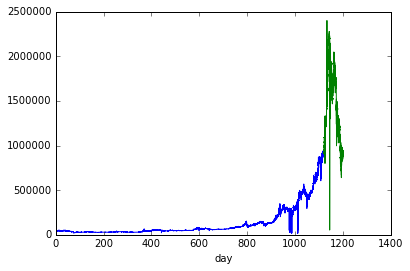

In [260]:
i_dates = dates.astype('uint64')
date_start = i_dates[0]
i_dates -= date_start
plt.plot(i_dates/(1e9*60*60*24), x)
i_dates_ = dates_.astype('uint64')
i_dates_ -= date_start
plt.plot(i_dates_/(1e9*60*60*24), x_)
plt.xlabel('day')

In [212]:
dates[0].astype(np.datetime64)

numpy.datetime64('2017-03-31T06:07:12.000000000')

In [246]:
dates_[-1].astype(np.datetime64)

numpy.datetime64('2018-01-24T16:00:12.000000000')

In [247]:
df.index.values[-1]

numpy.datetime64('2018-02-14T00:02:56.000000000')